In [ ]:
#API HOMEWORK
#Ashley Nguyen(rhw9tv)

In [ ]:
#You have seen some examples of how to interact with JSON, CSV and make API Calls. Take
#some time to explore the YAHOO Finance Guide at https://financeapi.net/ which shows you
#endpoints for calling information. Your job is to code a Python Program that does the following
#things:
#1. Takes user input for a stock (using the Ticker Symbol): IE with the input() command
#2. You will display back the user: Ticker Name, Full Name of the Stock, Current Market
#Price, Target Mean Price, 52 week high and 52 week low. Also, output 5 of the current
#trending stock.
#3. Put that data in a DataFrame and then store that to a CSV file
#4. Handle Errors (IE, the stock doesn’t exist and/or the API is not returning information


#You will have to read the documentation and figure out which modules to call to get the data
#that you need. You will need to make more than one call to this API. Use the examples in our
#Zoom Session to guide you, but the documentation will be enough. Post your code to GitHub.
#Bonus –
#1. Use MatPlotLib to chart the historical price of a stock price’s highest value over the past
#5 days.

In [1]:
import json
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
stock=input()

msft


In [3]:
print("The Stock we will research is: " + stock)

The Stock we will research is: msft


In [4]:
#Ticker Name, Full Name of the Stock, Current Market Price 52 week high and 52 week low
apikey="n/a"
url = "https://yfapi.net/v6/finance/quote"
querystring = {"symbols":stock}
headers = {
    'x-api-key': apikey
    }

response = requests.request("GET", url, headers=headers, params=querystring)

stock_json = response.json()
ticker_name = stock_json['quoteResponse']['result'][0]["symbol"]
full_name = stock_json['quoteResponse']['result'][0]["longName"]
current_price = stock_json['quoteResponse']['result'][0]["regularMarketPrice"]
fiftytwo_high = stock_json['quoteResponse']['result'][0]["regularMarketPrice"]
fiftytwo_low = stock_json['quoteResponse']['result'][0]["fiftyTwoWeekLow"]

In [5]:
#Target Mean Price
base_url = "https://yfapi.net/v11/finance/quoteSummary/{symbol}"
url2 = base_url.format(symbol=stock)
api_module = "financialData"
querystring2 = {"modules":api_module}

response2 = requests.request("GET", url2, headers=headers, params=querystring2)

stock_json2 = response2.json()
target_mean_price = stock_json2['quoteSummary']['result'][0]['financialData']["targetMeanPrice"]["fmt"]

In [6]:
#5 Trending Stocks
url3 = "https://yfapi.net/v1/finance/trending/US"

response3 = requests.request("GET", url3, headers=headers)

stock_json3 = response3.json()
trending_stocks = stock_json3['finance']['result'][0]['quotes']
top_five_stocks = [i['symbol'] for i in trending_stocks[:5]]

In [7]:
#Display for User
df_values = {'Ticker Name': ticker_name,
            'Full Name': full_name,
            'Current Market Price': current_price,
            'Target Mean Price': target_mean_price,
            '52 Week High': fiftytwo_high,
            '52 Week Low': fiftytwo_low
        }

for key, value in df_values.items():
            print(f"{key}: {value}")
        
print("Five current trending stock: " + ", ".join(top_five_stocks))

Ticker Name: MSFT
Full Name: Microsoft Corporation
Current Market Price: 428.02
Target Mean Price: 496.38
52 Week High: 428.02
52 Week Low: 311.21
Five current trending stock: BTC-USD, XRP-USD, DOGE-USD, SCHD, NNN


In [8]:
#Put that data in a DataFrame and then store that to a CSV file
df = pd.DataFrame([df_values]) 
display(df)
df.to_csv(f"{stock}_stock_info.csv")


,Ticker Name,Full Name,Current Market Price,Target Mean Price,52 Week High,52 Week Low
0,MSFT,Microsoft Corporation,428.02,496.38,428.02,311.21


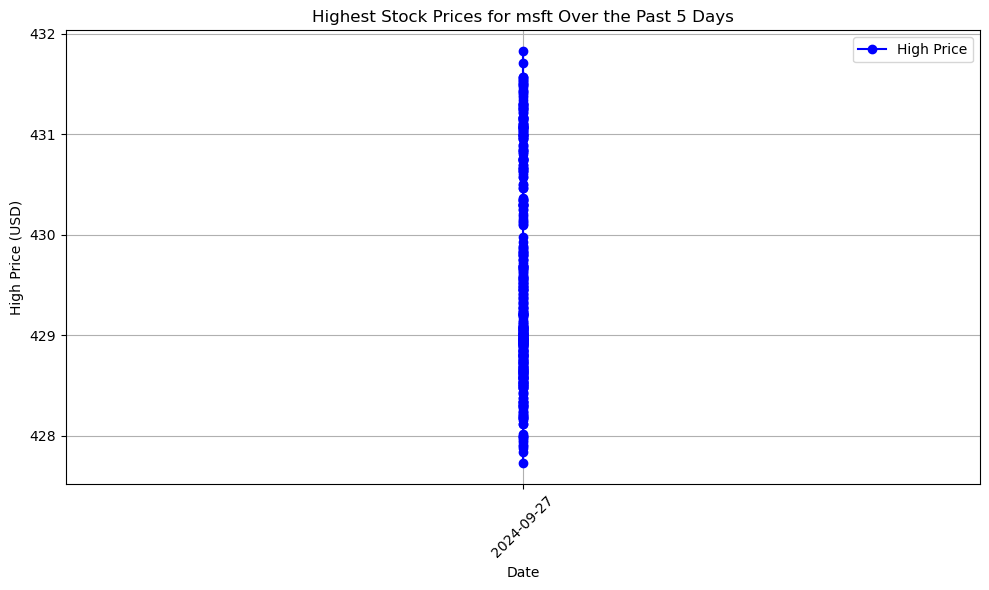

In [9]:
#Bonus (couldn't figure out)
base_url3 =  "https://yfapi.net/v8/finance/chart/{ticker}"
url4 = base_url3.format(ticker=stock)
response4 = requests.request("GET", url4, headers=headers)

stock_json4 = response4.json()
    
timestamps = stock_json4['chart']['result'][0]['timestamp']
highs = stock_json4['chart']['result'][0]['indicators']['quote'][0]['high']
    
dates = [datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d') for ts in timestamps]
    
df = pd.DataFrame({'Date': dates, 'High': highs})
    
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['High'], marker='o', linestyle='-', color='blue', label='High Price')
plt.title(f'Highest Stock Prices for {stock} Over the Past 5 Days')
plt.xlabel('Date')
plt.ylabel('High Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()